In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

#### Case Study 1: Customers at the Mall

Import the Dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')  
X = dataset.iloc[:, [3,4]].values

Use elbow method to find optimal number of clusters

C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\k

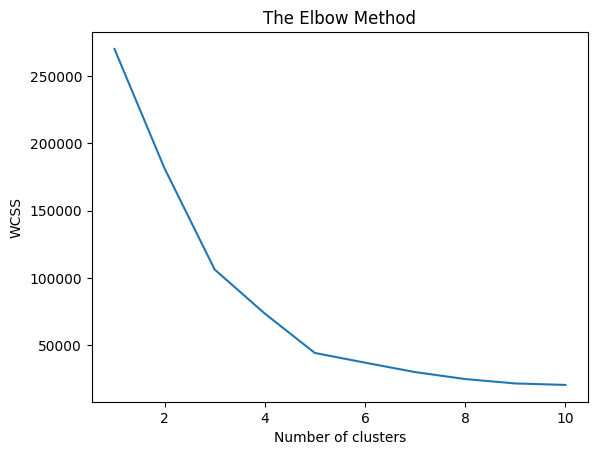

In [3]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range (1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

According to this graph, it looks like there willl be 5 clusters

Performing K-means algorithm

In [4]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualizing the clusters

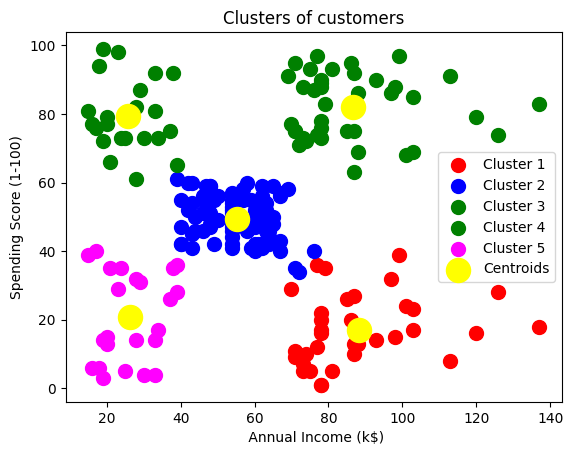

In [5]:
plt.scatter(X[y_kmeans == 0, 0] , X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0] , X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0] , X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0] , X[y_kmeans == 3, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0] , X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300,c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel(' Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Creating a dendogram

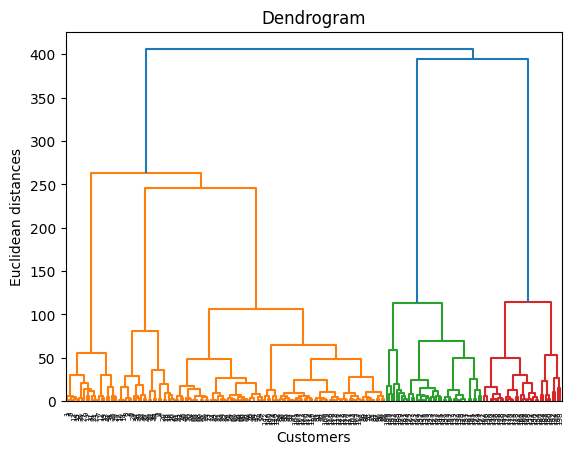

In [6]:
import scipy.cluster.hierarchy as sch
dendrogram_obj = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Train using Hierarchical Clustering (agglomerative in this case) 

In [7]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering (n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Visualizing the clusters

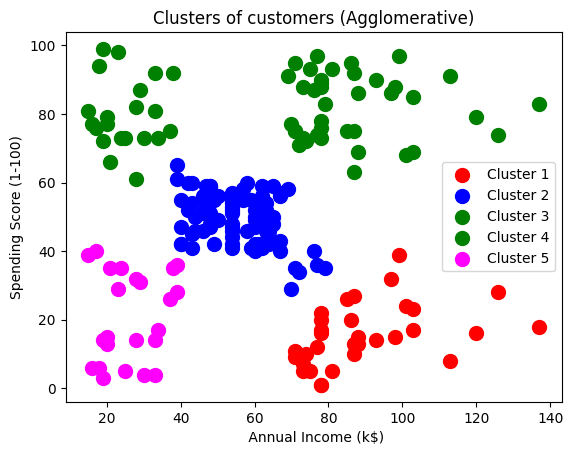

In [8]:
plt.scatter(X[y_hc == 0, 0] , X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0] , X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0] , X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0] , X[y_hc == 3, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0] , X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers (Agglomerative)')
plt.xlabel(' Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

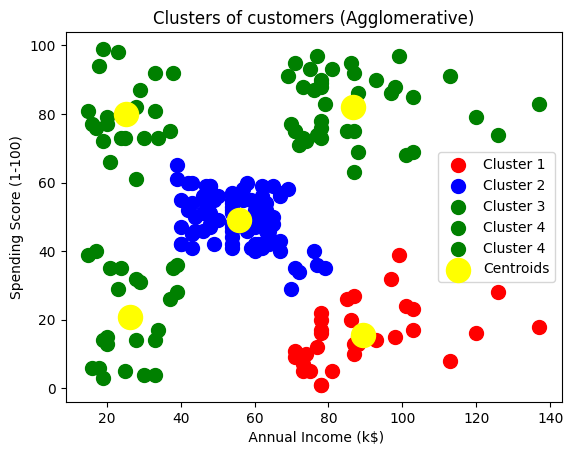

In [9]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X, y_hc)

plt.scatter(X[y_hc == 0, 0] , X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0] , X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0] , X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0] , X[y_hc == 3, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0] , X[y_hc == 4, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(clf.centroids_[:, 0], clf.centroids_[:, 1], s = 300, c = 'yellow', label = 'Centroids') 
plt.title('Clusters of customers (Agglomerative)')
plt.xlabel(' Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

This result is pretty interesting in that we have 5 groups: those who make a lot and spend a lot, those who make a lot and don't spend a lot, those who don't make as much and spend a lot, those who don't make a lot and don't spend that much, and those who make a decent amount and spend a decent amount. I would like to explore more into looking at who belongs in these groups. For example, the group who spends a lot and don't make a lot of income are probably the typical teenage girls (that's just my prediction).

#### Case Study 2: U.S. Arrests Dataset

In [10]:
dataset_2 = pd.read_csv('USArrests.csv')
X_2 = dataset_2.iloc[:,1:5].values

Using elbow method to find/visualize number of clusters

C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\k

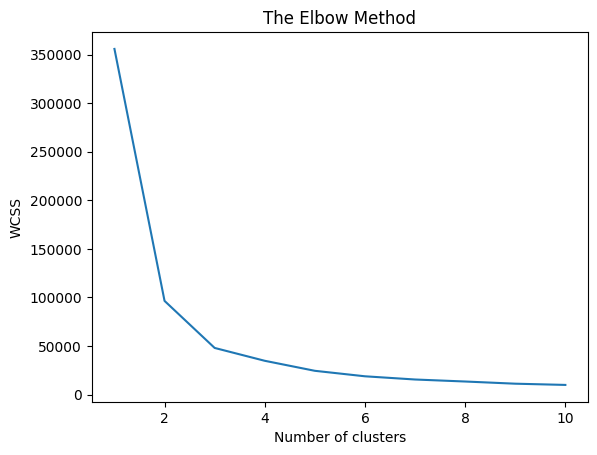

In [11]:
from sklearn.cluster import KMeans
wcss_2 = []
for i in range (1, 11):
    kmeans_2 = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans_2.fit(X_2) 
    wcss_2.append(kmeans_2.inertia_)
plt.plot(range (1, 11), wcss_2)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Performing K-Mean Algorithm

In [12]:
kmeans_2 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans_2 = kmeans_2.fit_predict(X_2)

C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualizing Clusters from K-means

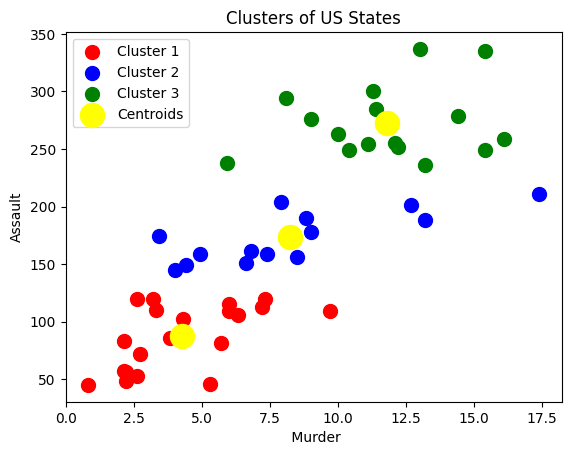

In [13]:
plt.scatter(X_2[y_kmeans_2 == 0, 0] , X_2[y_kmeans_2 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_2[y_kmeans_2 == 1, 0] , X_2[y_kmeans_2 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_2[y_kmeans_2 == 2, 0] , X_2[y_kmeans_2 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:, 1], s = 300,	c = 'yellow', label = 'Centroids')
plt.title('Clusters of US States')
plt.xlabel(' Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()

Creating a dendogram

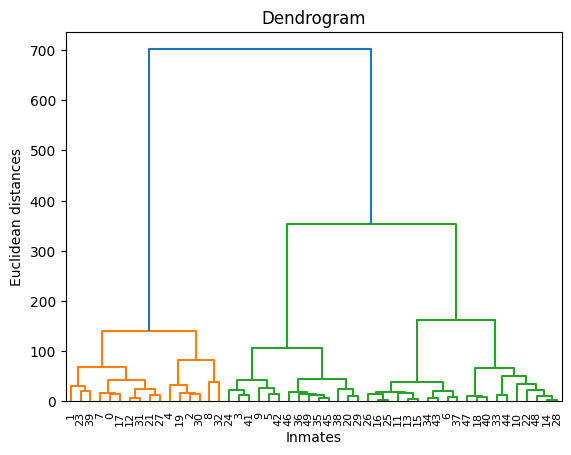

In [27]:
import scipy.cluster.hierarchy as sch
dendrogram_obj = sch.dendrogram(sch.linkage(X_2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Inmates')
plt.ylabel('Euclidean distances')
plt.show()

Training using agglomerative clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering
hc_2 = AgglomerativeClustering (n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc_2 = hc_2.fit_predict(X_2)
print(y_hc_2)

[1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0]


C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Visualizing the CLusters

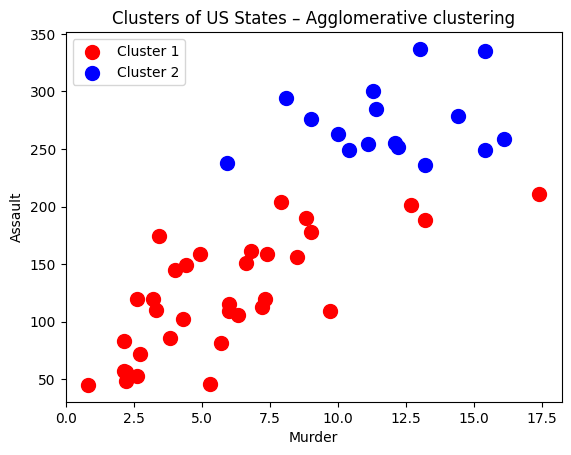

In [16]:
plt.scatter(X_2[y_hc_2 == 0, 0] , X_2[y_hc_2 == 0, 1], s = 100, 
c = 'red', label = 'Cluster 1')
plt.scatter(X_2[y_hc_2 == 1, 0] , X_2[y_hc_2 == 1, 1], s = 100, 
c = 'blue', label = 'Cluster 2')
plt.title('Clusters of US States – Agglomerative clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()

Not much needs to be said about these results. It makes sense that a higher assault rate corresponds with a higher murder rate and vice versa.

#### Case Study 3: Iris Dataset

In [17]:
from sklearn.datasets import load_iris
dataset_3 = load_iris()
X_3 = dataset_3['data']

Using elbow method to find optimal num of clusters

C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\k

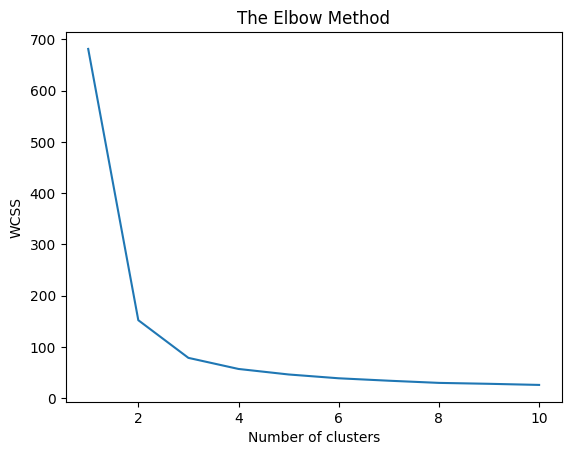

In [18]:
from sklearn.cluster import KMeans
wcss_3 = []
for i in range (1, 11):
    kmeans_3 = KMeans(n_clusters = i, init = 'k-means++', 
    random_state = 0)
    kmeans_3.fit(X_3)
    wcss_3.append(kmeans_3.inertia_)
plt.plot(range (1, 11), wcss_3)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Fitting using K-means

In [19]:
kmeans_3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans_3 = kmeans_3.fit_predict(X_3)

C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualizing the clusters

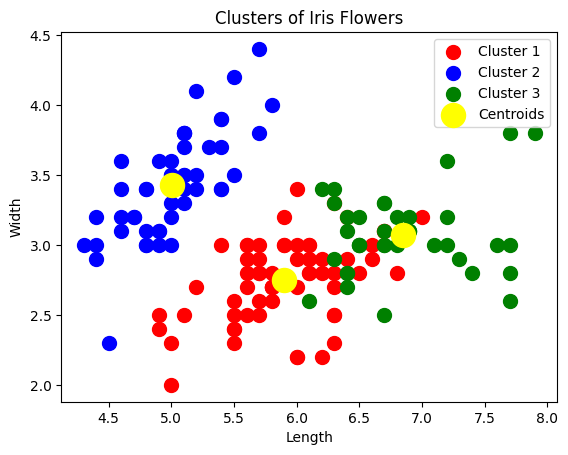

In [20]:
plt.scatter(X_3[y_kmeans_3 == 0, 0] , X_3[y_kmeans_3 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_3[y_kmeans_3 == 1, 0] , X_3[y_kmeans_3 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_3[y_kmeans_3 == 2, 0] , X_3[y_kmeans_3 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans_3.cluster_centers_[:,0], kmeans_3.cluster_centers_[:, 1], s = 300,	c = 'yellow', label = 'Centroids')
plt.title('Clusters of Iris Flowers')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

Dendogram

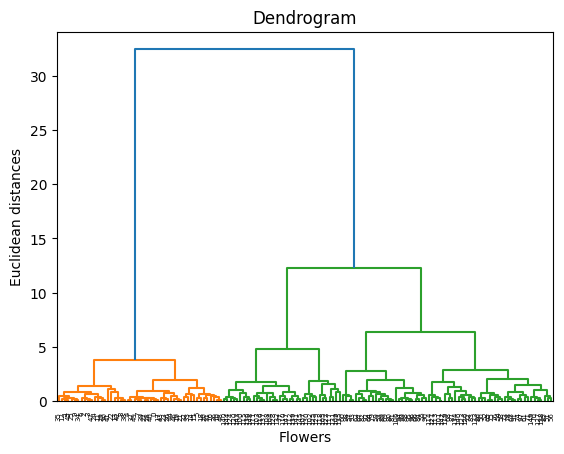

In [21]:
import scipy.cluster.hierarchy as sch
dendrogram_obj_3 = sch.dendrogram(sch.linkage(X_3, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Flowers')
plt.ylabel('Euclidean distances')
plt.show()

Training the Hierarchical Clustering model on the dataset

In [31]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering (n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc_3 = hc.fit_predict(X_3)
print(y_hc_3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 2 1 2 1 2 1 1 2 1 2 2 2 2
 2 2 2 4 2 1 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 4 2 3 4 4 3 1 3 4 3 4
 4 4 2 2 4 4 3 3 2 4 2 3 2 4 3 2 2 4 3 3 3 4 2 2 3 4 4 2 4 4 4 2 4 4 4 2 4
 4 2]


C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


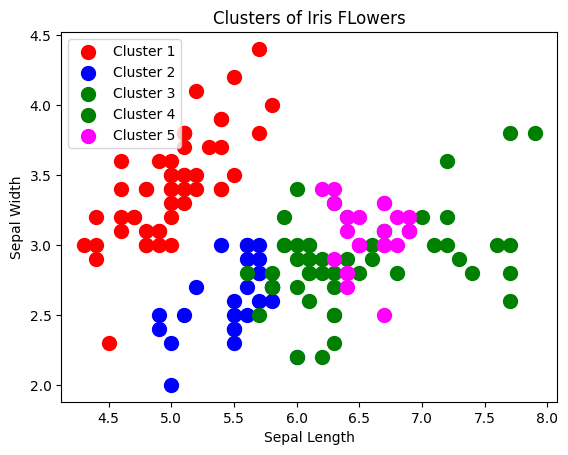

In [32]:
plt.scatter(X_3[y_hc_3 == 0, 0] , X_3[y_hc_3 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_3[y_hc_3 == 1, 0] , X_3[y_hc_3 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_3[y_hc_3 == 2, 0] , X_3[y_hc_3 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_3[y_hc_3 == 3, 0] , X_3[y_hc_3 == 3, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X_3[y_hc_3 == 4, 0] , X_3[y_hc_3 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of Iris FLowers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

Visaulizing the Clusters!

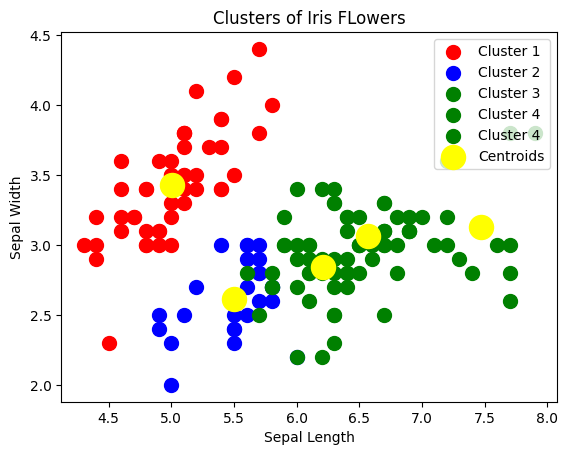

In [33]:
from sklearn.neighbors import NearestCentroid
clf_3 = NearestCentroid()
clf_3.fit(X_3, y_hc_3)

plt.scatter(X_3[y_hc_3 == 0, 0] , X_3[y_hc_3 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_3[y_hc_3 == 1, 0] , X_3[y_hc_3 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_3[y_hc_3 == 2, 0] , X_3[y_hc_3 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_3[y_hc_3 == 3, 0] , X_3[y_hc_3 == 3, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X_3[y_hc_3 == 4, 0] , X_3[y_hc_3 == 4, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(clf_3.centroids_[:, 0], clf_3.centroids_[:, 1], s = 300, c = 'yellow', label = 'Centroids') 
plt.title('Clusters of Iris FLowers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

#### Case 4: Implement K-Means clustering

In [23]:
dataset_cities = pd.read_csv('cities.csv')  
X_cities = dataset_cities.iloc[:, [1,2,3]].values

Find an optimum number of clusters by using the elbow method. Plot graph showing the number of clusters.

C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\k

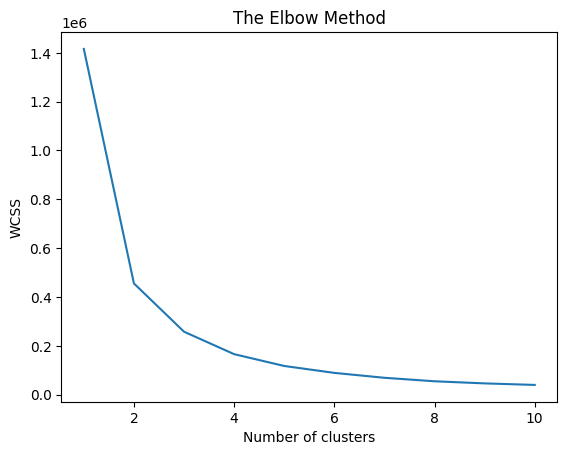

In [24]:
from sklearn.cluster import KMeans
wcss_cities = []
for i in range (1, 11):
    kmeans_cities = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans_cities.fit(X_cities)
    wcss_cities.append(kmeans_cities.inertia_)
plt.plot(range (1, 11), wcss_cities)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

According to the graph, it looks like 2 clusters is the optimal choice.

K-Mean algorithm Implementation

In [25]:
kmeans_cities = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
y_kmeans_cities = kmeans_cities.fit_predict(X_cities)

C:\Users\kimig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualizing the Clusters

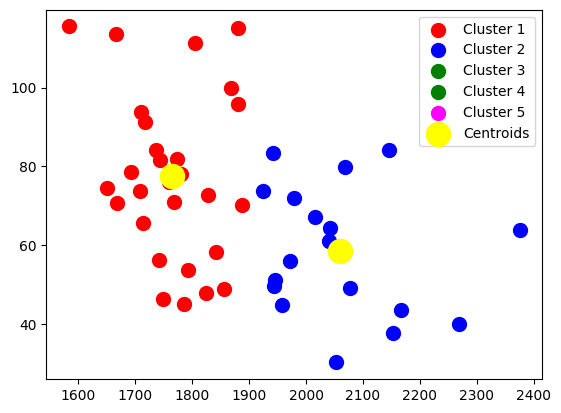

In [34]:
plt.scatter(X_cities[y_kmeans_cities == 0, 0] , X_cities[y_kmeans_cities == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_cities[y_kmeans_cities == 1, 0] , X_cities[y_kmeans_cities == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_cities[y_kmeans_cities == 2, 0] , X_cities[y_kmeans_cities == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_cities[y_kmeans_cities == 3, 0] , X_cities[y_kmeans_cities == 3, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X_cities[y_kmeans_cities == 4, 0] , X_cities[y_kmeans_cities == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans_cities.cluster_centers_[:,0], kmeans_cities.cluster_centers_[:, 1], s = 300,c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()